In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [3]:
customer_xls = './data/customerlist.xlsx'

In [4]:
customer_df = pd.read_excel(customer_xls, sheet_name='Sheet1')
customer_df.head()

,순번,성별,상품종류,상품가입일,요일,가입경로,금액
0,14,1,예금,20220401,5,비대면,20000000
1,5,1,예금,20220401,5,비대면,10000000
2,13,1,예금,20220401,5,비대면,1500000
3,4,1,예금,20220401,5,비대면,1000000
4,3,2,적금,20220401,5,창구,200000


In [5]:
len(customer_df)

100

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순번      100 non-null    int64 
 1   성별      100 non-null    int64 
 2   상품종류    100 non-null    object
 3   상품가입일   100 non-null    int64 
 4   요일      100 non-null    int64 
 5   가입경로    100 non-null    object
 6   금액      100 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 5.6+ KB


In [7]:
customer_df = customer_df.replace({'성별':1},'남자')
customer_df = customer_df.replace({'성별':2},'여자')
customer_df.loc[customer_df['상품가입일']==20220402,'가입경로'] = '비대면'
customer_df.head(5)

,순번,성별,상품종류,상품가입일,요일,가입경로,금액
0,14,남자,예금,20220401,5,비대면,20000000
1,5,남자,예금,20220401,5,비대면,10000000
2,13,남자,예금,20220401,5,비대면,1500000
3,4,남자,예금,20220401,5,비대면,1000000
4,3,여자,적금,20220401,5,창구,200000


3. 남녀 상품가입 비율

*위의 데이터 중 na값 확인하기

(0) 남녀비율 원그래프

In [8]:
customer_df.groupby('성별').size()

성별
남자    49
여자    51
dtype: int64

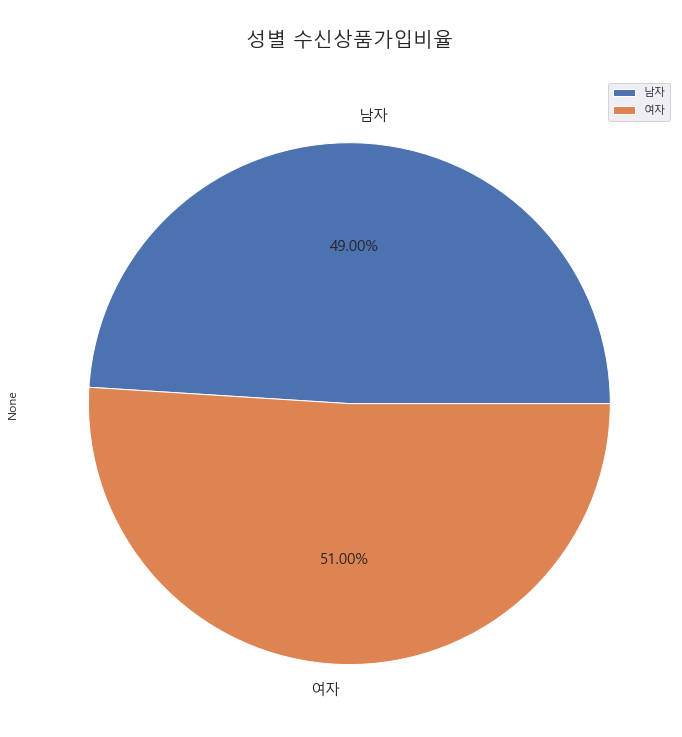

In [9]:
df_sex = customer_df.groupby('성별').size()

df_sex.plot(kind='pie',
            figsize=(12,12),
            autopct='%.2f%%',
            shadow=False, 
            fontsize=15
            )
plt.legend(df_sex.index[:2], loc=1)
plt.title("\n성별 수신상품가입비율\n", fontsize=20)
plt.show()

(1) 남녀 가입경로 그래프

In [11]:
sex_merc = customer_df.loc[:,['성별','가입경로']]
sex_merc

,성별,가입경로
0,남자,비대면
1,남자,비대면
2,남자,비대면
3,남자,비대면
4,여자,창구
...,...,...
95,여자,창구
96,남자,비대면
97,여자,비대면
98,남자,비대면


In [12]:
data = sex_merc.groupby(['성별','가입경로']).value_counts()
data

성별  가입경로
남자  비대면     45
    창구       4
여자  비대면     39
    창구      12
dtype: int64

In [13]:
data[2:4]

성별  가입경로
여자  비대면     39
    창구      12
dtype: int64

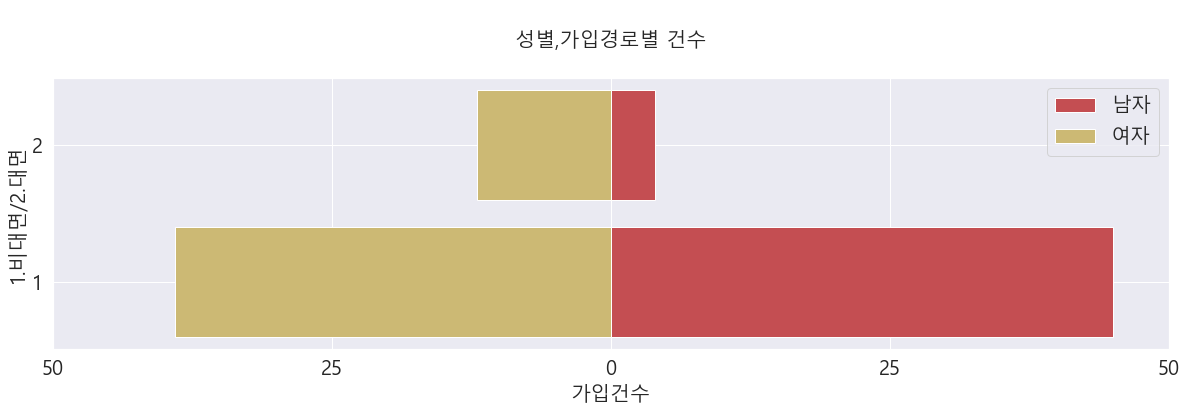

In [14]:
t  = np.arange(2)+1 #
y  = data[0:2] #남자
y1 = data[2:4] #여자

plt.figure(figsize=(20,5))
plt.barh(t,y, color='r', label='남자')
plt.barh(t, -y1, color='y', label='여자')
plt.xlabel('가입건수', fontsize=20)
plt.ylabel('1.비대면/2.대면', fontsize=20)
plt.legend(fontsize=20)
plt.xticks([-50,-25,0,25,50],('50','25','0','25','50'), fontsize=20)
plt.yticks([1,2],('1','2'), fontsize=20)
plt.title("\n성별,가입경로별 건수\n", fontsize=20)
# Get or set the *x*-limits of the current tick locations and labels.
plt.show() 

4.가입일자별 상품별 가입비율

(1) 분할막대차트 4/1 ~ 4/15일까지 만들기

In [15]:
day_merc = customer_df.loc[:,['상품가입일','상품종류']]
day_merc

,상품가입일,상품종류
0,20220401,예금
1,20220401,예금
2,20220401,예금
3,20220401,예금
4,20220401,적금
...,...,...
95,20220415,적금
96,20220415,펀드
97,20220415,적금
98,20220415,적금


In [16]:
day_merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품가입일   100 non-null    int64 
 1   상품종류    100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [17]:
from datetime import datetime

In [18]:
day_merc['상품가입일'] = pd.to_datetime(day_merc['상품가입일'], format='%Y%m%d') 
# customer_df.head(10)
day_merc.tail(10)

,상품가입일,상품종류
90,2022-04-15,펀드
91,2022-04-15,적금
92,2022-04-15,적금
93,2022-04-15,적금
94,2022-04-15,펀드
95,2022-04-15,적금
96,2022-04-15,펀드
97,2022-04-15,적금
98,2022-04-15,적금
99,2022-04-15,펀드


In [19]:
day_merc.set_index('상품가입일', inplace=True)           
day_merc.head(10)

,상품종류
상품가입일,
2022-04-01,예금
2022-04-01,예금
2022-04-01,예금
2022-04-01,예금
2022-04-01,적금
2022-04-01,펀드
2022-04-01,적금
2022-04-01,펀드
2022-04-01,적금


In [20]:
day_merc.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
             1,  2,  2,  2,  2,  2,  2,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
             4,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
             7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9, 10, 10, 11,
            11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 14, 15, 15,
            15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
           dtype='int64', name='상품가입일')

In [21]:
len(day_merc)

100

In [22]:
day_merc['상품가입일자'] = day_merc.index.day
day_merc.head(10)

,상품종류,상품가입일자
상품가입일,,
2022-04-01,예금,1
2022-04-01,예금,1
2022-04-01,예금,1
2022-04-01,예금,1
2022-04-01,적금,1
2022-04-01,펀드,1
2022-04-01,적금,1
2022-04-01,펀드,1
2022-04-01,적금,1


In [23]:
day_merc_num = day_merc.groupby(['상품가입일자','상품종류']).value_counts()
day_merc_num

상품가입일자  상품종류
1       예금       4
        적금      10
        펀드       4
2       예금       2
        적금       4
3       펀드       2
4       예금       2
        적금       6
        펀드       1
5       펀드       2
6       예금       1
        적금       2
        펀드       1
7       예금       2
        적금       6
        펀드       3
8       예금       1
        적금       6
        펀드       4
9       펀드       2
10      적금       1
        펀드       1
11      예금       2
        적금       9
        펀드       2
12      펀드       1
13      펀드       1
14      적금       1
15      예금       3
        적금       8
        펀드       6
dtype: int64

In [24]:
type(day_merc_num)

pandas.core.series.Series

In [25]:
day_merc_num2 = day_merc_num.unstack(1).fillna(0)
day_merc_num2

상품종류,예금,적금,펀드
상품가입일자,,,
1,4.0,10.0,4.0
2,2.0,4.0,0.0
3,0.0,0.0,2.0
4,2.0,6.0,1.0
5,0.0,0.0,2.0
6,1.0,2.0,1.0
7,2.0,6.0,3.0
8,1.0,6.0,4.0
9,0.0,0.0,2.0


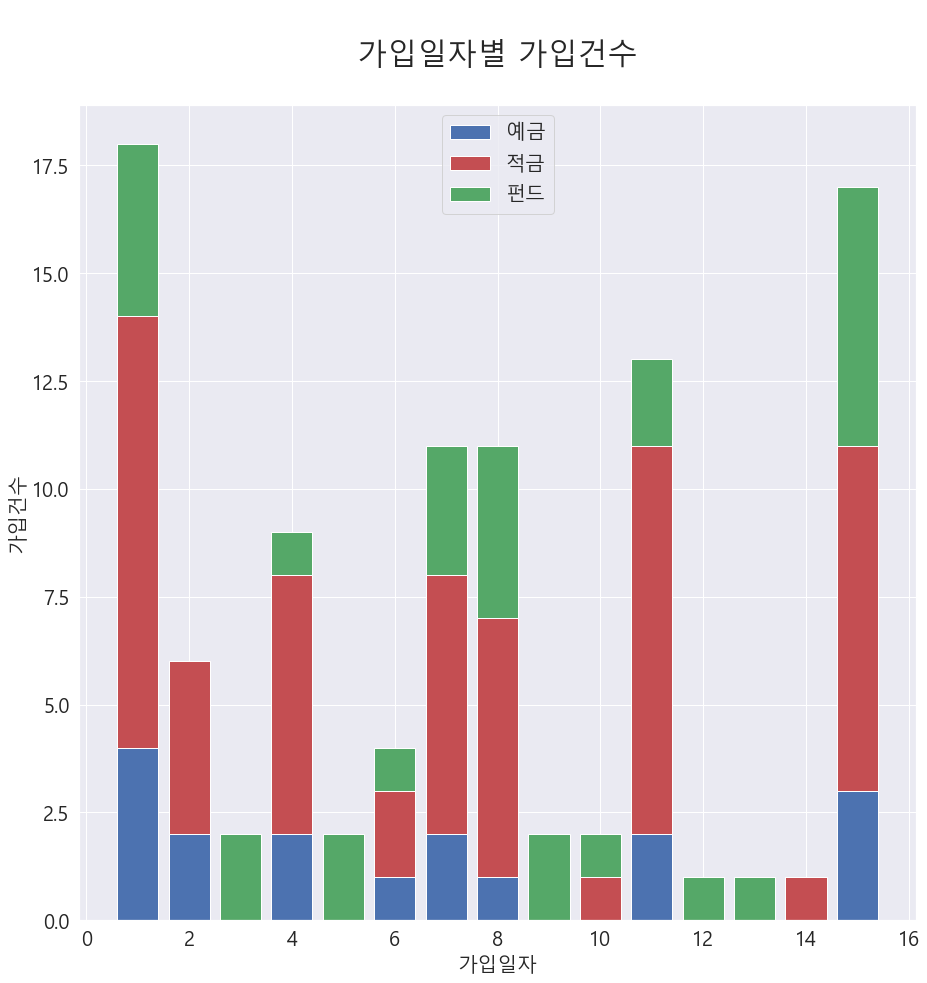

In [26]:
#분할막대차트 그리기

A = day_merc_num2.iloc[:,0]#예금
B = day_merc_num2.iloc[:,1]#적금
C = day_merc_num2.iloc[:,2]#펀드

X = day_merc_num2.index

plt.figure(figsize=(15,15))
plt.bar(X, A, color='b', label='예금')
plt.bar(X, B, color='r', bottom=A,label='적금')
plt.bar(X, C, color='g', bottom=A+B,label='펀드')

plt.xlabel('가입일자', fontsize=20)
plt.ylabel('가입건수', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("\n가입일자별 가입건수\n", fontsize=30)

plt.show()

(2) 요일별 상품가입건수 
-> 2주의 월화수목금토일을 
-> 요일 평균으로 barh로 그린다.

In [27]:
day_merc2 = day_merc.reset_index()
day_merc2

,상품가입일,상품종류,상품가입일자
0,2022-04-01,예금,1
1,2022-04-01,예금,1
2,2022-04-01,예금,1
3,2022-04-01,예금,1
4,2022-04-01,적금,1
...,...,...,...
95,2022-04-15,적금,15
96,2022-04-15,펀드,15
97,2022-04-15,적금,15
98,2022-04-15,적금,15


In [28]:
?pd.to_datetime

In [29]:
day_merc2['상품가입요일'] = day_merc2['상품가입일'].dt.day_name() 
# customer_df.head(10)
day_merc2.tail(10)

,상품가입일,상품종류,상품가입일자,상품가입요일
90,2022-04-15,펀드,15,Friday
91,2022-04-15,적금,15,Friday
92,2022-04-15,적금,15,Friday
93,2022-04-15,적금,15,Friday
94,2022-04-15,펀드,15,Friday
95,2022-04-15,적금,15,Friday
96,2022-04-15,펀드,15,Friday
97,2022-04-15,적금,15,Friday
98,2022-04-15,적금,15,Friday
99,2022-04-15,펀드,15,Friday


In [30]:
day_merc3 = day_merc2.drop(['상품가입일','상품종류'], axis='columns')
day_merc3

,상품가입일자,상품가입요일
0,1,Friday
1,1,Friday
2,1,Friday
3,1,Friday
4,1,Friday
...,...,...
95,15,Friday
96,15,Friday
97,15,Friday
98,15,Friday


In [31]:
weekday_num = day_merc3.groupby(['상품가입일자','상품가입요일']).value_counts()
weekday_num

상품가입일자  상품가입요일   
1       Friday       18
2       Saturday      6
3       Sunday        2
4       Monday        9
5       Tuesday       2
6       Wednesday     4
7       Thursday     11
8       Friday       11
9       Saturday      2
10      Sunday        2
11      Monday       13
12      Tuesday       1
13      Wednesday     1
14      Thursday      1
15      Friday       17
dtype: int64

In [32]:
weekday_num2 = round(weekday_num.groupby(['상품가입요일']).mean(),0)
weekday_num2

상품가입요일
Friday       15.0
Monday       11.0
Saturday      4.0
Sunday        2.0
Thursday      6.0
Tuesday       2.0
Wednesday     2.0
dtype: float64

In [33]:
weekday_num3 = weekday_num2.sort_values(ascending=False)
weekday_num3

상품가입요일
Friday       15.0
Monday       11.0
Thursday      6.0
Saturday      4.0
Sunday        2.0
Tuesday       2.0
Wednesday     2.0
dtype: float64

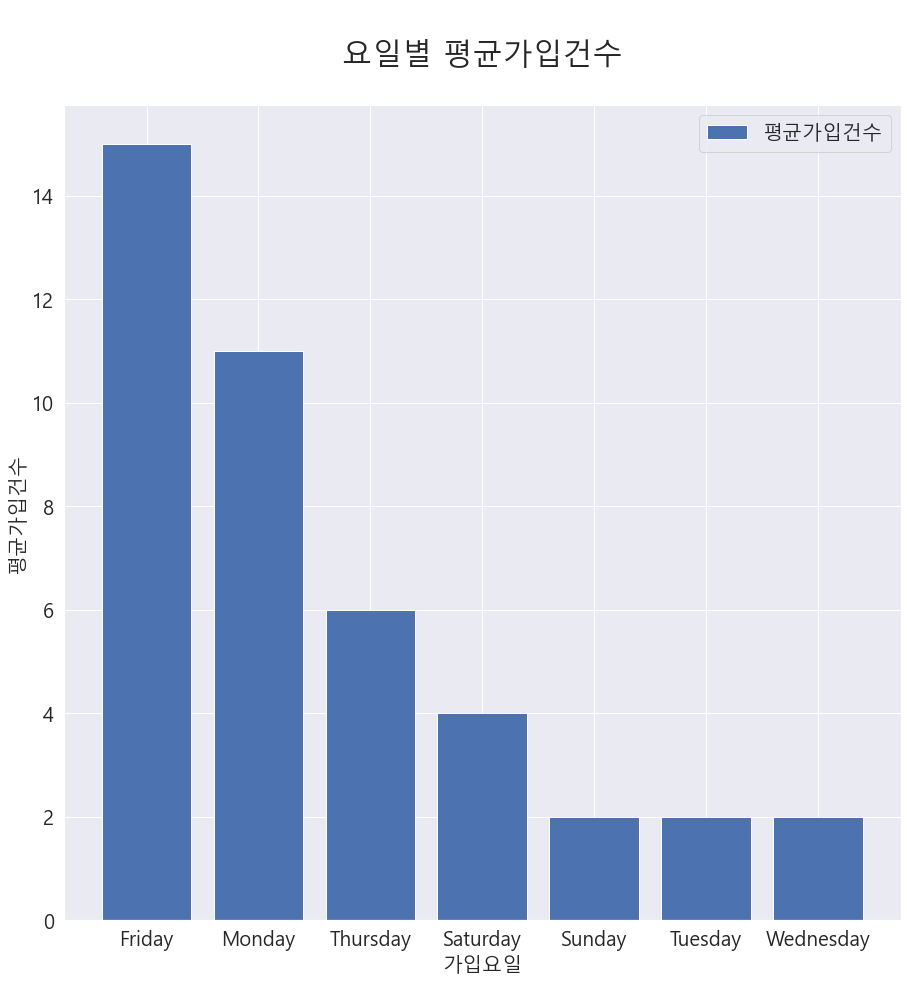

In [198]:
#요일 막대차트 그리기

A = weekday_num3.values#예금

X = weekday_num3.index

plt.figure(figsize=(15,15))
plt.bar(X, A, color='b', label='평균가입건수')

plt.xlabel('가입요일', fontsize=20)
plt.ylabel('평균가입건수', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("\n요일별 평균가입건수\n", fontsize=30)

plt.show()

#sub plot 함수로

In [92]:
def draw_sex(pie):
    if pie=='n':
        t  = ['비대면','대면'] #
        y  = data[0:2] #남자
        y1 = data[2:4] #여자
#         plt.figure(figsize=(20,5))
        plt.barh(t,y, color='r', label='남자')
        plt.barh(t, -y1, color='y', label='여자')
        plt.xlabel('가입건수', fontsize=20)
        plt.ylabel('1.비대면/2.대면', fontsize=20)
        plt.legend(fontsize=10)
        plt.xticks([-50,-25,0,25,50],('50','25','0','25','50'), fontsize=20)
        plt.yticks([0,1],('비대면','대면'), fontsize=20)
        plt.title("\n성별,가입경로별 건수\n", fontsize=20)
#         plt.show() 
    elif pie=='y':
        df_sex = customer_df.groupby('성별').size()
        df_sex.plot(kind='pie',
#                     figsize=(12,12),
                    autopct='%.2f%%',
                    shadow=False, 
                    fontsize=15
                    )
        plt.legend(df_sex.index[:2], loc=1)
        plt.title("\n성별 수신상품가입비율\n", fontsize=20)
#         plt.show()
    else:
        print("Not Operation !!")
        return
    
#     plt.axis('equal')

In [106]:
def draw_day(weekday):
    if weekday=='일자별':
        #분할막대차트 그리기
        A = day_merc_num2.iloc[:,0]#예금
        B = day_merc_num2.iloc[:,1]#적금
        C = day_merc_num2.iloc[:,2]#펀드
        X = day_merc_num2.index

#         plt.figure(figsize=(15,15))
        plt.bar(X, A, color='b', label='예금')
        plt.bar(X, B, color='r', bottom=A,label='적금')
        plt.bar(X, C, color='g', bottom=A+B,label='펀드')
        plt.xlabel('가입일자', fontsize=20)
        plt.ylabel('가입건수', fontsize=20)
        plt.legend(fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.title("\n가입일자별 가입건수\n", fontsize=30)

#         plt.show()
        
    elif weekday=='요일별':
        A = weekday_num3.values #예금
        X = weekday_num3.index
#         plt.figure(figsize=(15,15))
        plt.bar(X, A, color='b', label='평균가입건수')
        plt.xlabel('가입요일', fontsize=20)
        plt.ylabel('평균가입건수', fontsize=20)
        plt.legend(fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=20)
        plt.title("\n요일별 평균가입건수\n", fontsize=30)

#         plt.show()
        
    else:
        print("Not Operation !!")
        return
    
    plt.axis('equal')
    

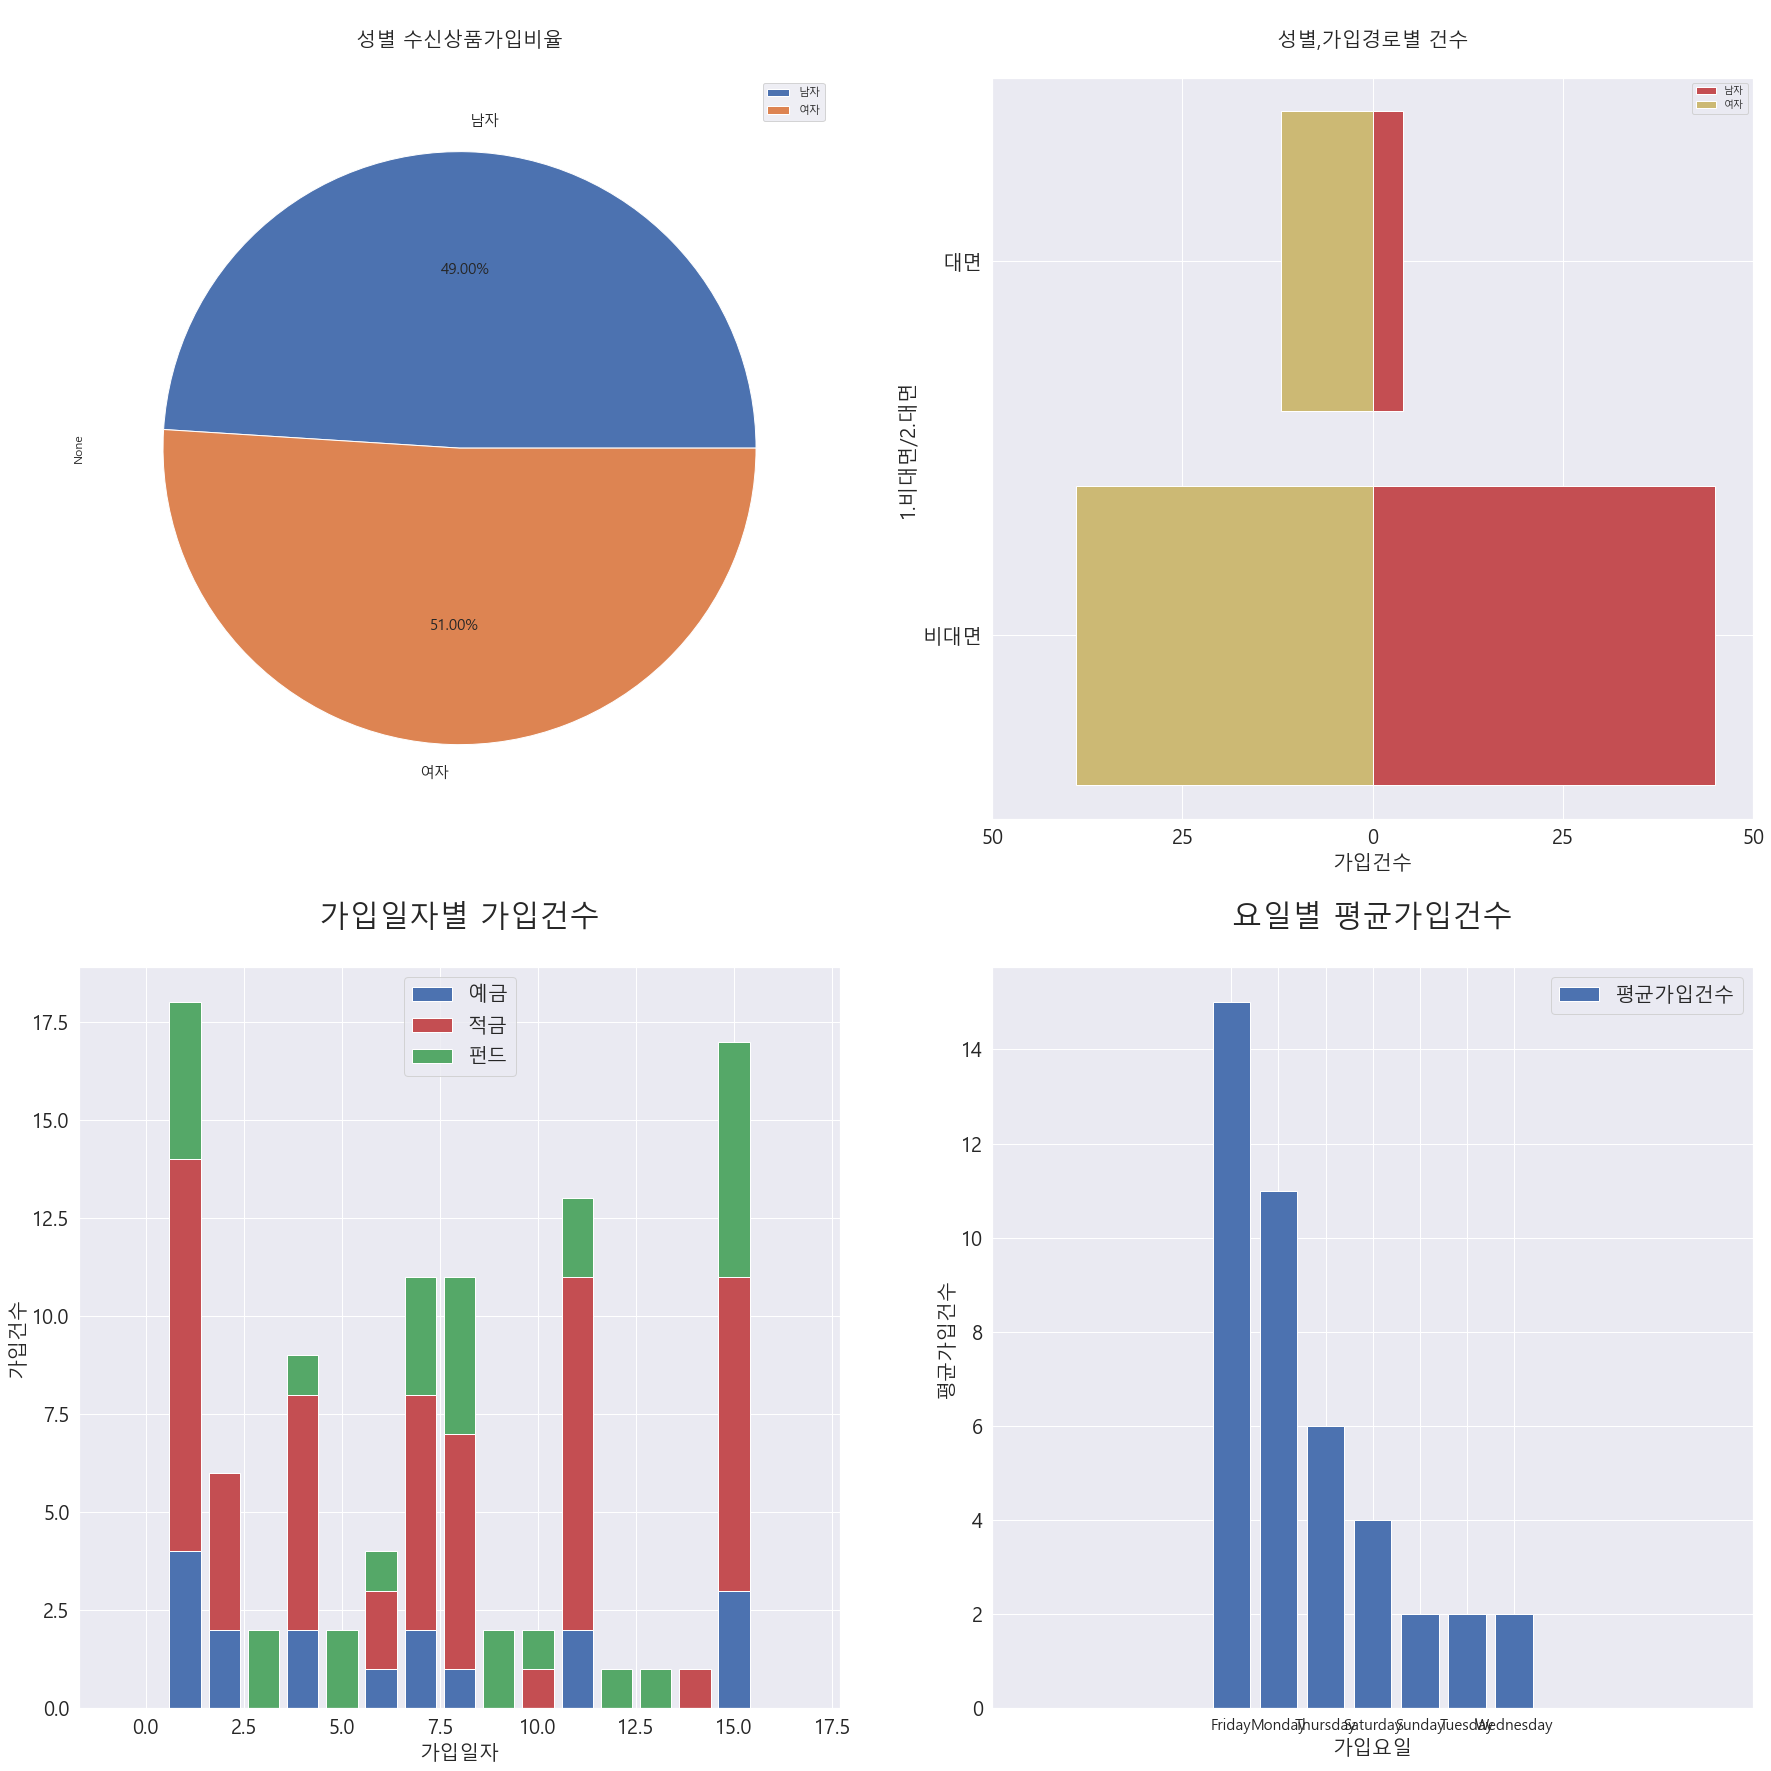

In [107]:
plt.figure(figsize=(30,30))

plt.subplot(221) 
draw_sex('y') # 성별 pie

plt.subplot(222) 
draw_sex('n') # 가입경로 bar차트

plt.subplot(223) 
draw_day('일자별') # 일자별 분할차트

plt.subplot(224) 
draw_day('요일별') # 요일별 막대차트

plt.show()